# **Website Traffic Analysis \& Forecasting**

---

### **Project Overview:**
In this project, we analyze website traffic data to uncover trends, engagement patterns, and user behavior. Using Python, we process and visualize the dataset to understand key metrics such as user sessions, engagement rates, and event counts. By leveraging SARIMA, a statistical forecasting model, we predict future website traffic trends to support decision-making and optimize digital strategies.

#### **Objective**
-   Analyze website traffic trends by exploring session patterns, engagement rates, and event interactions.

-   Visualize engagement metrics to identify factors contributing to high user interaction.

-   Understand traffic sources by evaluating performance across different acquisition channels.

-   Forecast website traffic using the SARIMA model to predict future sessions and user activity.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
print(f"{pd.__name__}: {pd.__version__}",
      f"{np.__name__}: {np.__version__}",
      f"{sns.__name__}: {sns.__version__}", sep='\n')

pandas: 2.2.3
numpy: 1.26.4
seaborn: 0.13.2


In [3]:
# Set default parameters
plt.rcParams.update({
    'figure.dpi': 200,            # Set the default DPI to 300
    'figure.facecolor': 'white',   # Set the default figure facecolor to white
    'axes.grid': False,           # Display grid on axes
    'grid.color': 'black',        # Set the grid color to black
    'grid.linestyle': '--',       # Set the grid line style to dashed
    'grid.linewidth': 0.5,        # Set the grid line width to 0.5
    'grid.alpha': 0.5,            # Set the grid alpha to 0.5
    'xtick.top': True,            # Display ticks on the top of the x-axis
    'xtick.bottom': True,         # Display ticks on the bottom of the x-axis
    'ytick.left': True,           # Display ticks on the left of the y-axis
    'ytick.right': True,          # Display ticks on the right of the y-axis
    'xtick.direction': 'in',       # Set the direction of x-axis ticks to 'in'
    'ytick.direction': 'in',       # Set the direction of y-axis ticks to 'in'
    'font.size': 10,              # Set the font size
    'text.usetex': True,          # Enable LaTeX rendering
    'font.family': 'serif',       # Font family for text
    'font.serif': ['Computer Modern Roman'],  # Font name for serif font (Others: 'Times New Roman', 'Georgia', 'Helvetica', 'Palatino')
    'font.weight': 'bold',      # Font weight
    'axes.linewidth': 0.25,       # Spine line width
    'xtick.major.width': 0.25,    # Major tick line width for x-axis
    'xtick.minor.width': 0.25,    # Minor tick line width for x-axis
    'ytick.major.width': 0.25,    # Major tick line width for y-axis
    'ytick.minor.width': 0.25,     # Minor tick line width for y-axis
    'legend.frameon': False,      # Disable legend frame
})

tab_colors = list(plt.cm.tab20c.colors)

## Data loading and Exploration

In [4]:
df = pd.read_csv('Data/website-traffic.csv', skiprows=1)
df

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001
...,...,...,...,...,...,...,...,...,...,...
3177,Unassigned,2024042806,0,1,0,0.000000,0.000000,2.000000,0.000000,2
3178,Unassigned,2024043005,0,1,0,0.000000,0.000000,2.000000,0.000000,2
3179,Unassigned,2024043006,0,1,0,0.000000,0.000000,2.000000,0.000000,2
3180,Unassigned,2024050105,0,1,0,0.000000,0.000000,2.000000,0.000000,2


In [5]:
# Rename column for better readability
df = df.rename(columns={'Session primary channel group (Default channel group)': 'Traffic source'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Traffic source                       3182 non-null   object 
 1   Date + hour (YYYYMMDDHH)             3182 non-null   int64  
 2   Users                                3182 non-null   int64  
 3   Sessions                             3182 non-null   int64  
 4   Engaged sessions                     3182 non-null   int64  
 5   Average engagement time per session  3182 non-null   float64
 6   Engaged sessions per user            3182 non-null   float64
 7   Events per session                   3182 non-null   float64
 8   Engagement rate                      3182 non-null   float64
 9   Event count                          3182 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 248.7+ KB


## Understanding the columns

1.	**Session primary channel group (Default channel group)**: This tells you the main category of the traffic source that brought users to the website, like “Organic Search,” “Direct,” or “Social Media.”
2.	**Date + hour (YYYYMMDDHH)**: This is a timestamp indicating when the user interactions happened. It combines the year, month, day, and hour in the format: YYYYMMDDHH.
3.	**Users**: The number of unique individuals who interacted with the website. If the same person visits multiple times, they are still counted as one user.
4.	**Sessions**: The total number of times users visited the website. A session starts when a user begins interacting with the website and ends after a period of inactivity or when they leave.
5.	**Engaged sessions**: The number of sessions in which users interacted meaningfully with the website, such as scrolling, clicking, or spending a significant amount of time.
6.	**Average engagement time per session**: The average amount of time users spent actively interacting with the website during a session (measured in seconds or minutes).
7.	**Engaged sessions per user**: On average, how many engaged sessions each unique user had. This gives insight into how frequently users engage deeply with the site.
8.	**Events per session**: The average number of interactions (or events) a user performed during a session, such as clicking a link, playing a video, or submitting a form.
9.	**Engagement rate**: The percentage of sessions classified as engaged sessions, providing an idea of how often visitors are truly interacting with the site.

10.	**Event count**:
The total number of events (user interactions) that occurred across all sessions, providing an overview of user activity.

In [7]:
df['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(df['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')
df['Users'] = pd.to_numeric(df['Users'])
df['Sessions'] = pd.to_numeric(df['Sessions'])

In [8]:
for col in df.columns:
    if df[col].dtype == 'int64':
        df[col] = df[col].astype('float64')

In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date + hour (YYYYMMDDHH),3182,2024-04-20 01:17:07.278441216,2024-04-06 00:00:00,2024-04-13 02:15:00,2024-04-20 02:00:00,2024-04-26 22:00:00,2024-05-03 23:00:00,NaN
Users,3182.0,41.935889,0.0,20.0,42.0,60.0,237.0,29.582258
Sessions,3182.0,51.192646,1.0,24.0,51.0,71.0,300.0,36.919962
Engaged sessions,3182.0,28.325581,0.0,13.0,27.0,41.0,144.0,20.650569
Average engagement time per session,3182.0,66.644581,0.0,32.103034,49.020202,71.487069,4525.0,127.200659
Engaged sessions per user,3182.0,0.60645,0.0,0.561404,0.666667,0.75,2.0,0.264023
Events per session,3182.0,4.675969,1.0,3.75,4.410256,5.21769,56.0,2.795228
Engagement rate,3182.0,0.503396,0.0,0.442902,0.545455,0.633333,1.0,0.228206
Event count,3182.0,242.27247,1.0,103.0,226.0,339.0,1402.0,184.440313


In [10]:
datetime_group = df.groupby('Date + hour (YYYYMMDDHH)').agg({'Users': 'sum', 'Sessions': 'sum'}).reset_index()

# group data by date and sum up the users and sessions
grouped_data = df.groupby(df['Date + hour (YYYYMMDDHH)']).agg({'Users': 'sum', 'Sessions': 'sum'})

grouped_data_2 = df.groupby(['Date + hour (YYYYMMDDHH)', 'Traffic source']).agg({'Users': 'sum'}).reset_index()
grouped_data_2.set_index('Date + hour (YYYYMMDDHH)', inplace=True)
# Sort index (important for time series operations)
grouped_data_2 = grouped_data_2.sort_index()

In [11]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=datetime_group['Date + hour (YYYYMMDDHH)'], y=datetime_group['Users'], mode='lines', name='Users'))
fig.add_trace(go.Scatter(x=datetime_group['Date + hour (YYYYMMDDHH)'], y=datetime_group['Sessions'], mode='lines', name='Sessions'))
fig.update_layout(title='Users and Sessions over time', xaxis_title='Date', yaxis_title='Count', template='plotly_dark', width=1400, height=400)
fig.update_traces(line=dict(width=1.5, color='orange'), selector=dict(name='Users'))
fig.update_traces(line=dict(width=1.5, color='crimson'), selector=dict(name='Sessions'))
fig.show()


Insights:

1.	Periodic fluctuations suggest regular user behavior patterns.
2.	Peaks might indicate marketing campaigns or content releases.

## Engagement Analysis

We analyze average engagement time per session, engaged sessions per user, events per session, and engagement rate to identify trends.

In [12]:
engagement_df = df.groupby('Date + hour (YYYYMMDDHH)').agg({
    'Average engagement time per session' : 'mean',
    'Engaged sessions per user' : 'mean',
    'Events per session' : 'mean',
    'Engagement rate' : 'mean'
})


fig = make_subplots(rows=2, cols=2, subplot_titles=['Average engagement time per session', 'Engaged sessions per user', 'Events per session', 'Engagement rate'])
fig.add_trace(go.Scatter(x=engagement_df.index, y=engagement_df['Average engagement time per session'], mode='lines', name='Average engagement time per session'), row=1, col=1)
fig.add_trace(go.Scatter(x=engagement_df.index, y=engagement_df['Engaged sessions per user'], mode='lines', name='Engaged sessions per user'), row=1, col=2)
fig.add_trace(go.Scatter(x=engagement_df.index, y=engagement_df['Events per session'], mode='lines', name='Events per session'), row=2, col=1)
fig.add_trace(go.Scatter(x=engagement_df.index, y=engagement_df['Engagement rate'], mode='lines', name='Engagement rate'), row=2, col=2)
fig.update_layout(title='Engagement metrics over time', template='plotly_dark', width=1900, height=800)
fig.update_traces(line=dict(width=1.5, color='orange'), selector=dict(name='Average engagement time per session'))
fig.update_traces(line=dict(width=1.5, color='crimson'), selector=dict(name='Engaged sessions per user'))
fig.update_traces(line=dict(width=1.5, color='green'), selector=dict(name='Events per session'))
fig.update_traces(line=dict(width=1.5, color='blue'), selector=dict(name='Engagement rate'))
fig.for_each_trace(lambda t: t.update(showlegend=False))

# X-label: Date, Y-label (row1, col1): Time (in seconds), Y-label (row2, col2): Count,  Y-label (row2, col2): Percentage
fig.update_xaxes(title_text='Date', row=1, col=1)
fig.update_xaxes(title_text='Date', row=1, col=2)
fig.update_xaxes(title_text='Date', row=2, col=1)
fig.update_xaxes(title_text='Date', row=2, col=2)
fig.update_yaxes(title_text='Time (in seconds)', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=2)
fig.update_yaxes(title_text='Count', row=2, col=1)
fig.update_yaxes(title_text='Rate', row=2, col=2)

fig.show()

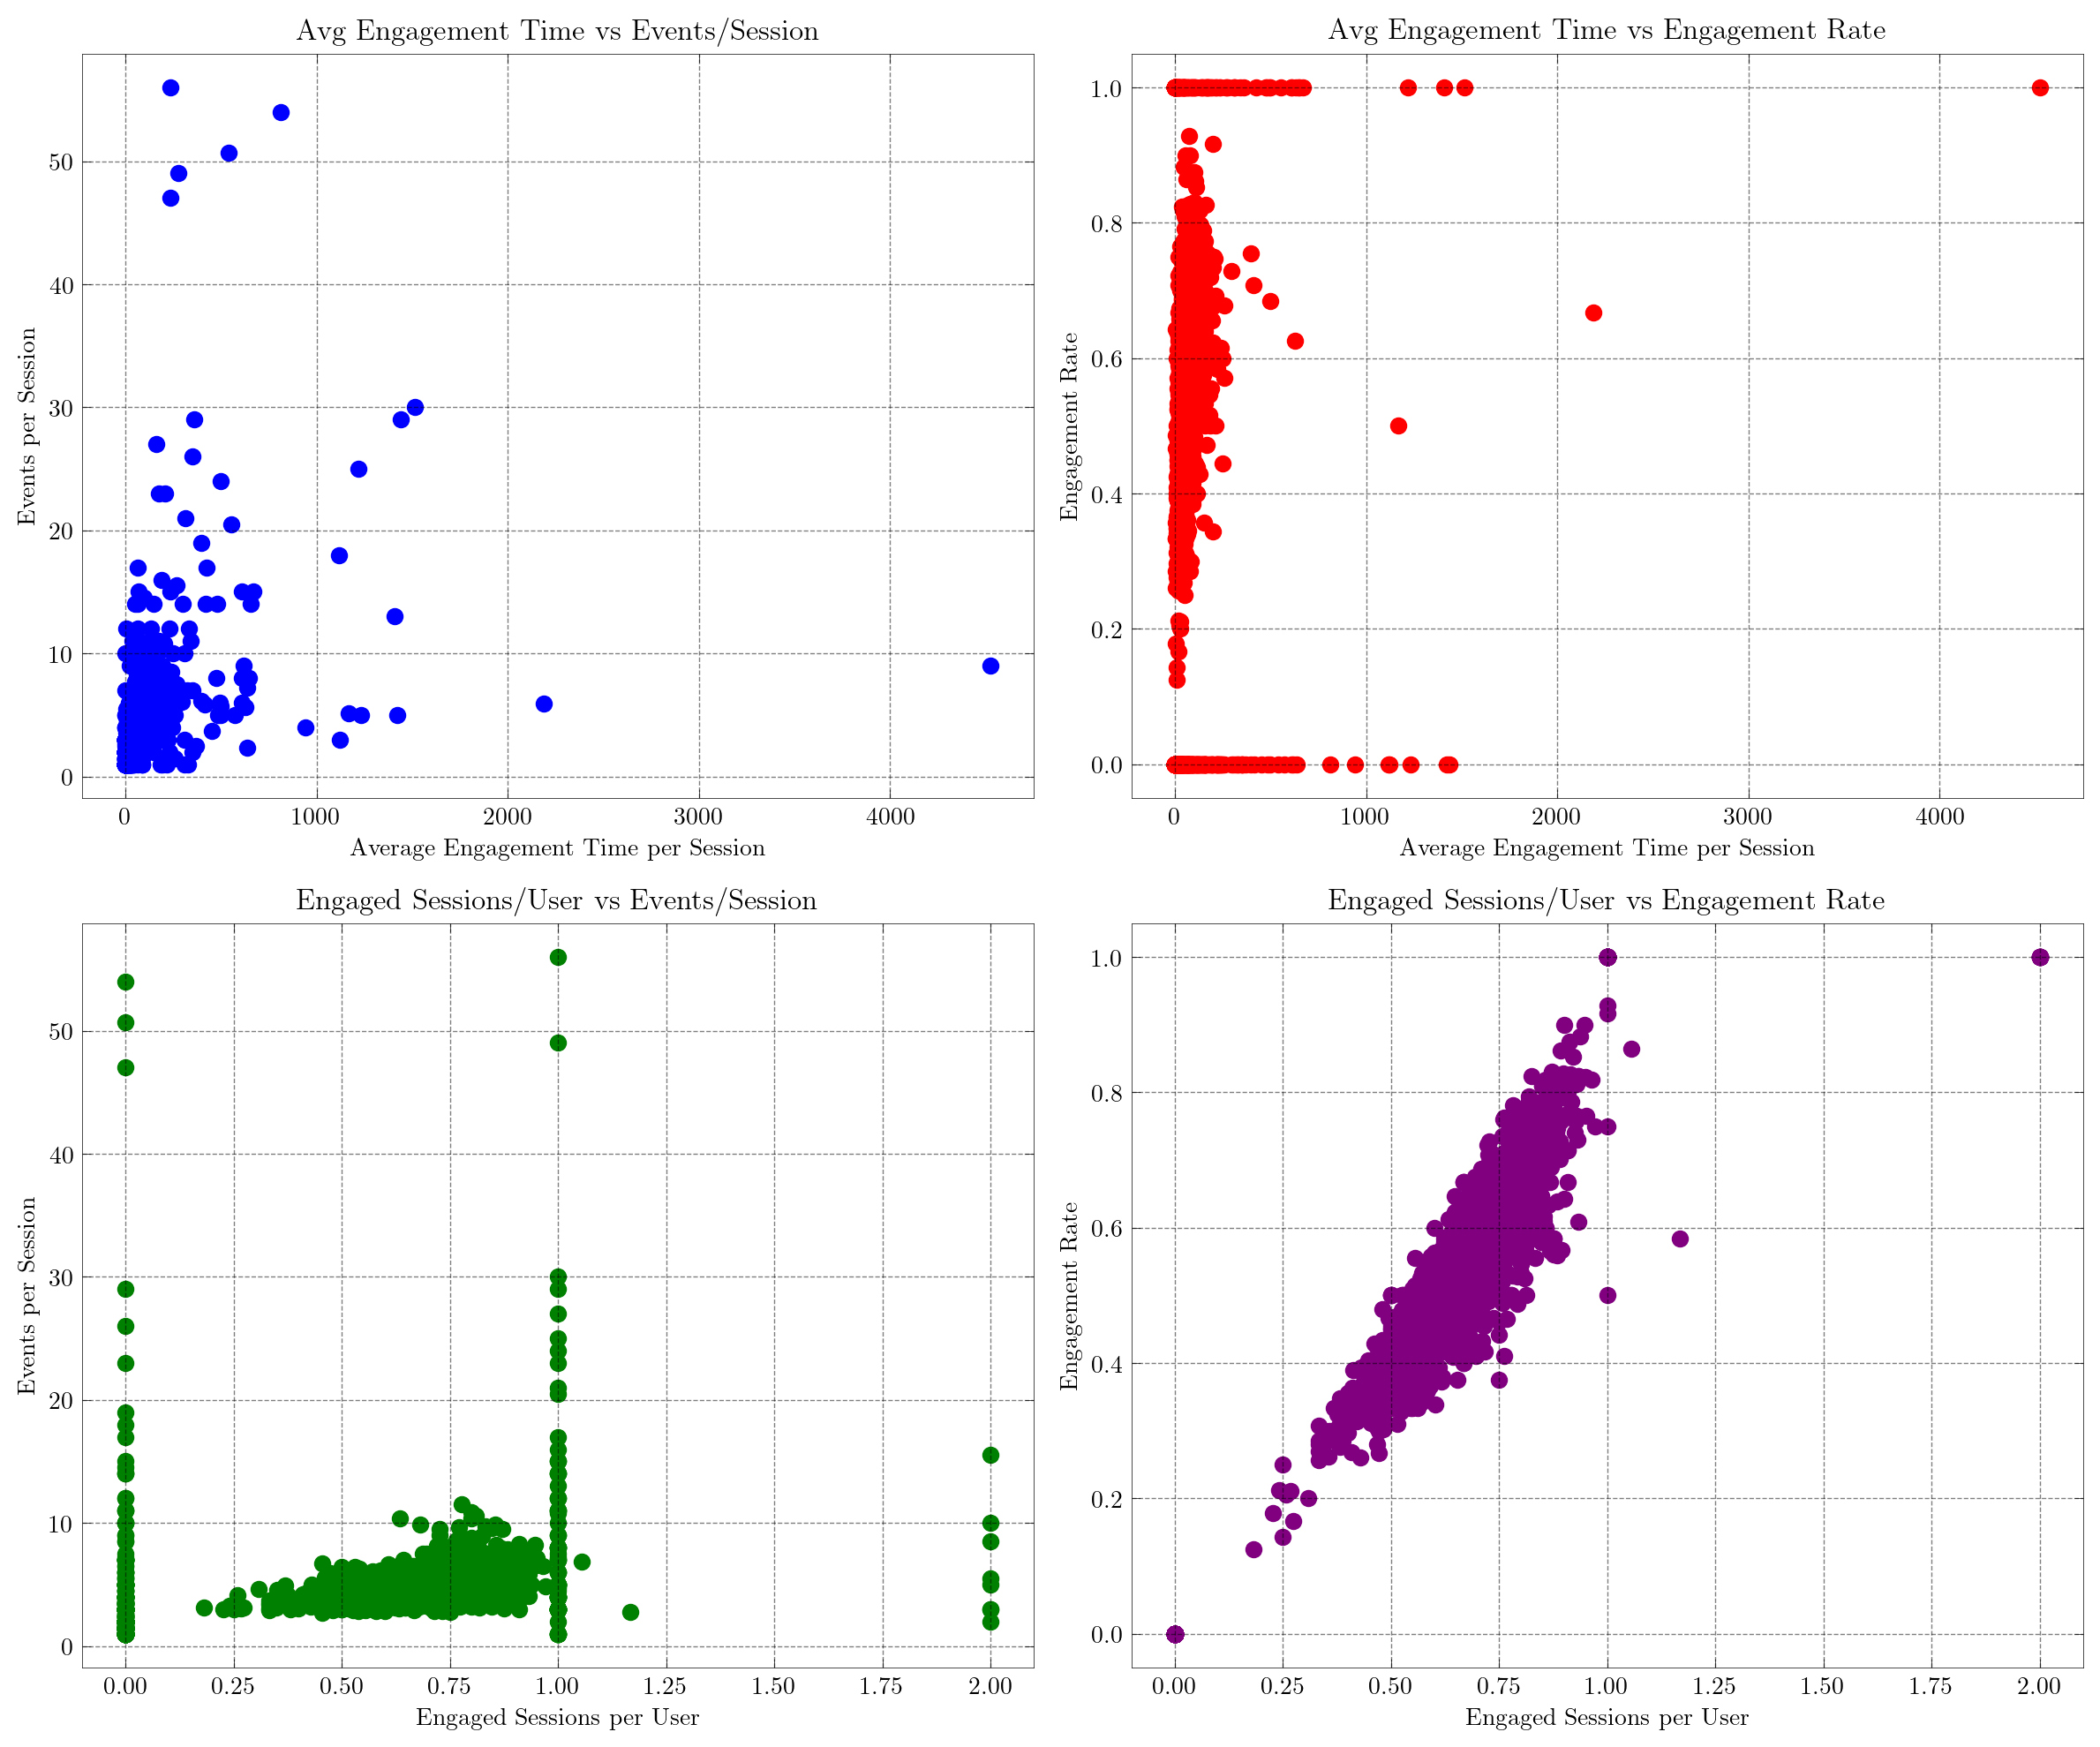

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# plot 1: average engagement time vs events per session
axes[0, 0].scatter(df['Average engagement time per session'], df['Events per session'], color='blue')
axes[0, 0].set_title('Avg Engagement Time vs Events/Session')
axes[0, 0].set_xlabel('Average Engagement Time per Session')
axes[0, 0].set_ylabel('Events per Session')
axes[0, 0].grid(True)  # enable grid

# plot 2: average engagement time vs engagement rate
axes[0, 1].scatter(df['Average engagement time per session'], df['Engagement rate'], color='red')
axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
axes[0, 1].set_xlabel('Average Engagement Time per Session')
axes[0, 1].set_ylabel('Engagement Rate')
axes[0, 1].grid(True)

# plot 3: engaged sessions per user vs events per session
axes[1, 0].scatter(df['Engaged sessions per user'], df['Events per session'], color='green')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engaged Sessions per User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True)

# plot 4: engaged sessions per user vs engagement rate
axes[1, 1].scatter(df['Engaged sessions per user'], df['Engagement rate'], color='purple')
axes[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')
axes[1, 1].set_xlabel('Engaged Sessions per User')
axes[1, 1].set_ylabel('Engagement Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

Observations:
1. High spikes in engagement time correlate with content releases.
2. Engaged sessions per user align one-to-one with engagement rate.

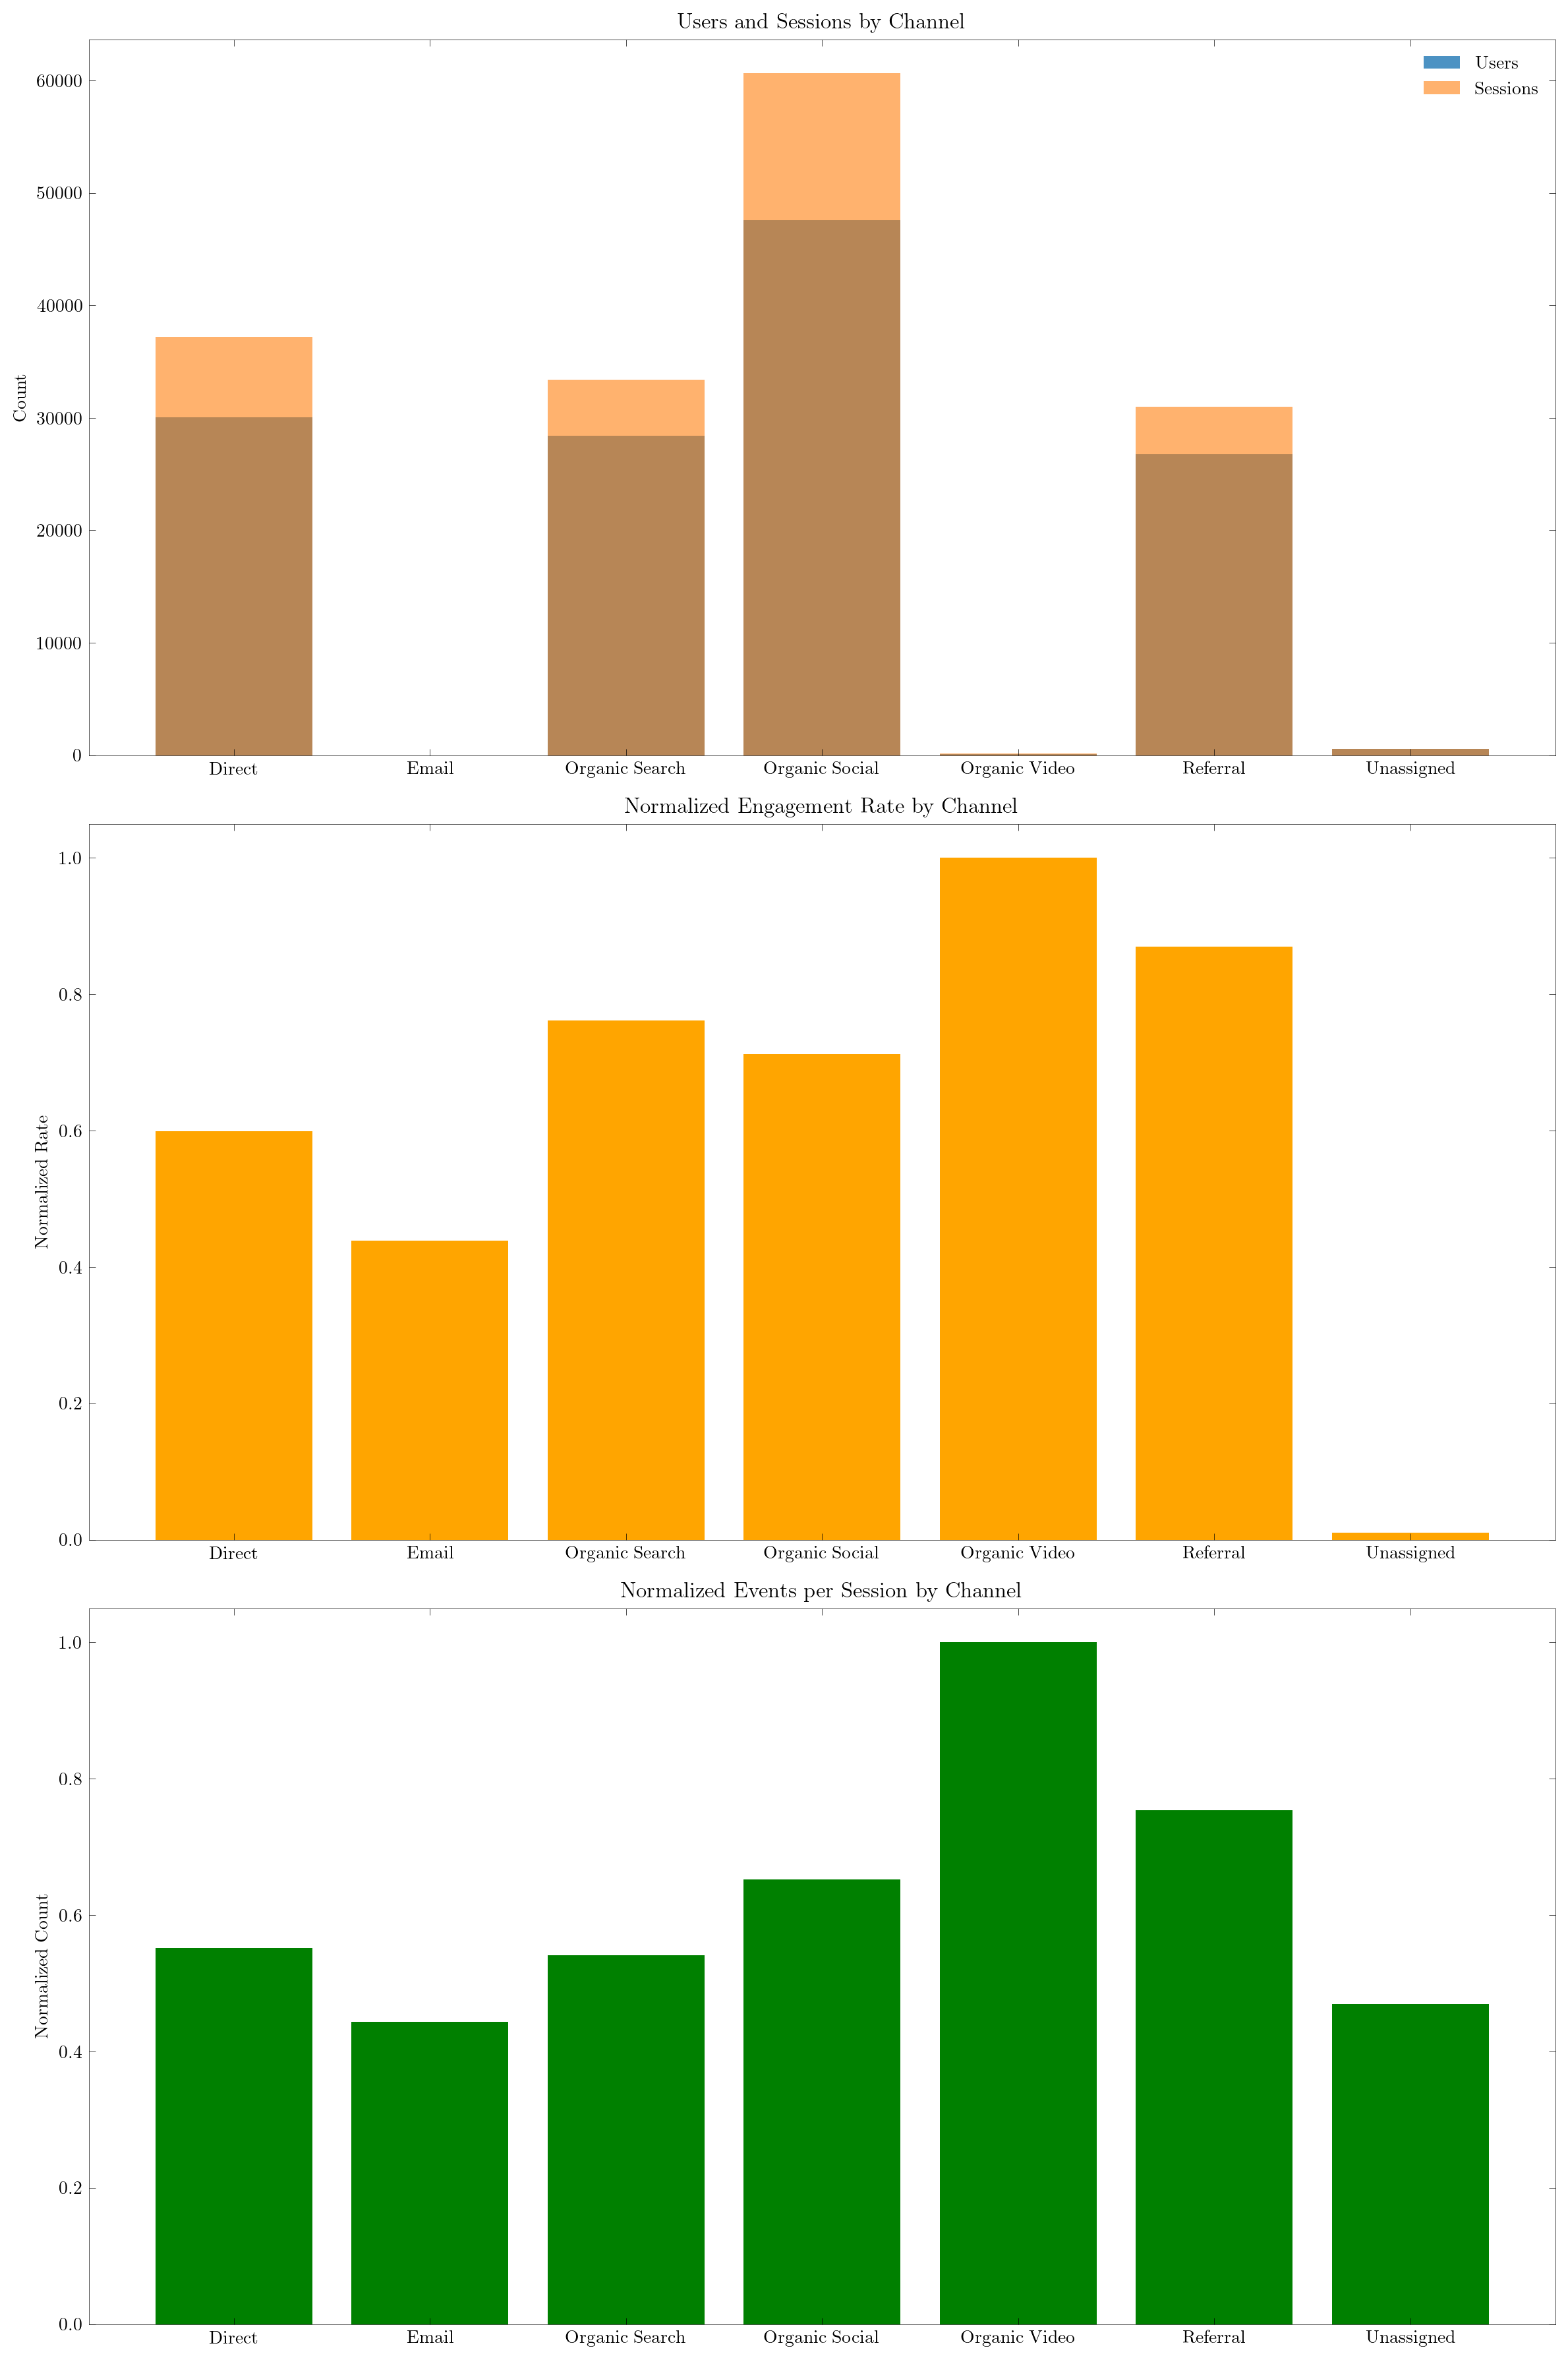

In [14]:
# group data by channel and aggregate necessary metrics
channel_performance = df.groupby('Traffic source').agg({
    'Users': 'sum',
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Engagement rate': 'mean',
    'Events per session': 'mean'
})

# normalize engagement rate and events per session for comparison
channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session'] / channel_performance['Events per session'].max()

# plotting channel performance metrics
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# users and sessions by channel
ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users', alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

# normalized engagement rate by channel
ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')

# normalized events per session by channel
ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='green')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()

Insights:
1. Organic Video and Referral bring most users.
2. Organic video contributes maximum to engagement.

## Traffic Forecasting (SARIMA Model)

Preprocessing Data for Forecasting

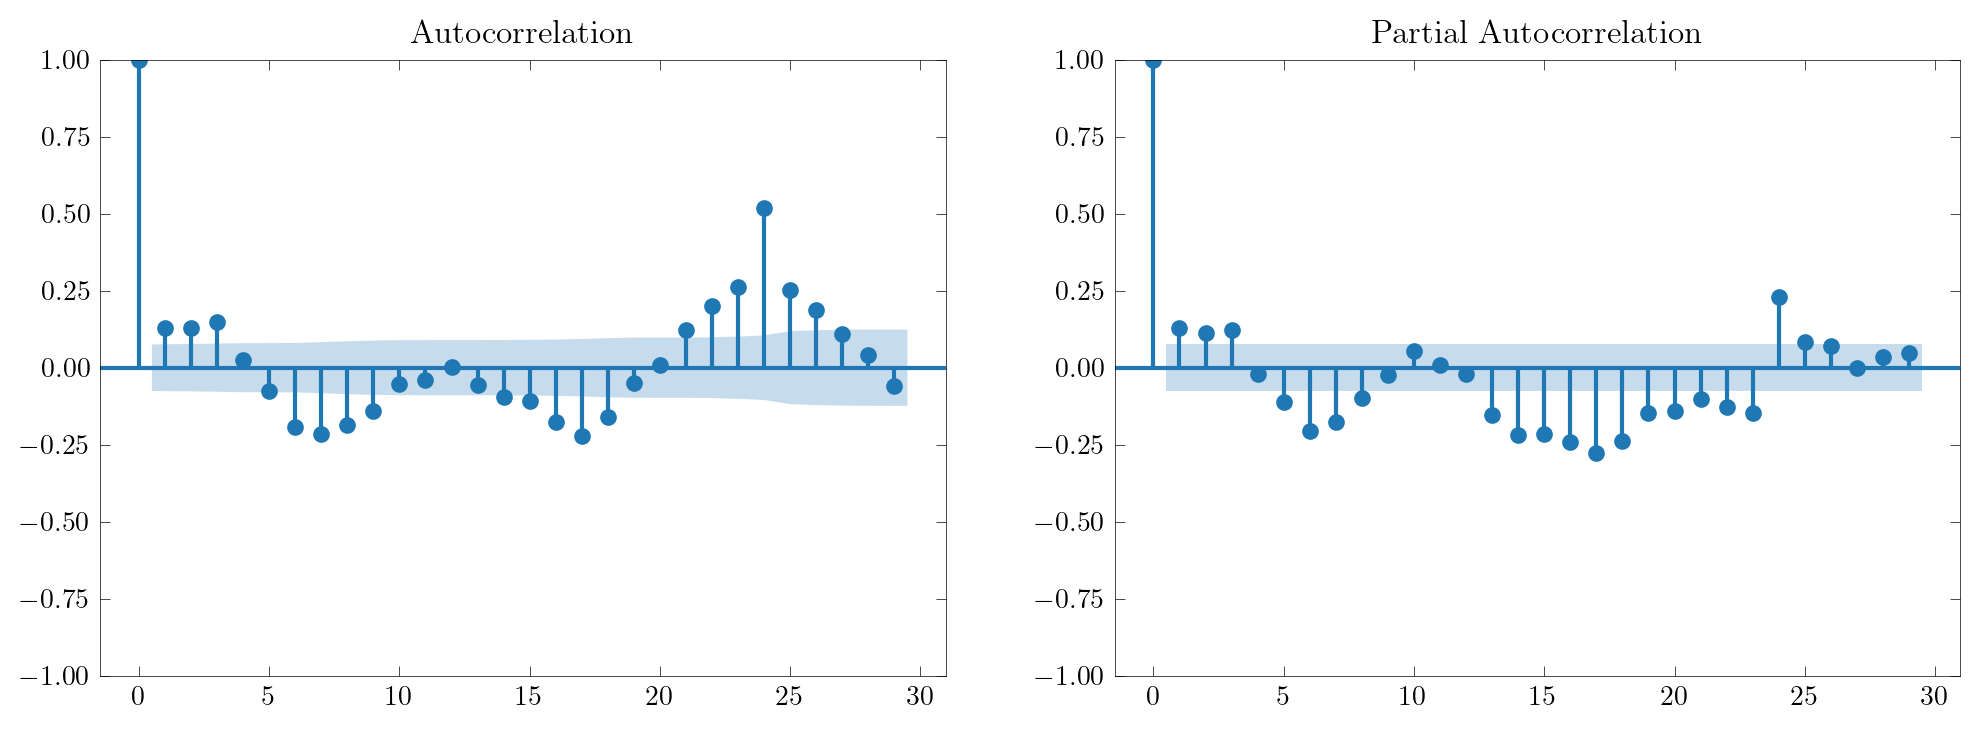

In [15]:

time_series_data_sessions = grouped_data['Sessions'].asfreq('h').ffill()
seasonal_period = 24

differenced_series = time_series_data_sessions.diff().dropna()

# plot ACF and PACF of time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

Building and Training the SARIMA model

/var/folders/xy/2yvnpx8d56vfjg1nvw677xx80000gn/T/ipykernel_9941/2571587992.py:1: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/var/folders/xy/2yvnpx8d56vfjg1nvw677xx80000gn/T/ipykernel_9941/2571587992.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.74212D+00    |proj g|=  6.85385D-02

At iterate    5    f=  4.70443D+00    |proj g|=  1.38562D-02

At iterate   10    f=  4.62848D+00    |proj g|=  4.98724D-03

At iterate   15    f=  4.62397D+00    |proj g|=  2.06889D-02

At iterate   20    f=  4.62304D+00    |proj g|=  4.69992D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     32      1     0     0   2.761D-06   4.623D+00
  F =   4.6230161093170166     

CONVERG

/var/folders/xy/2yvnpx8d56vfjg1nvw677xx80000gn/T/ipykernel_9941/2571587992.py:17: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/var/folders/xy/2yvnpx8d56vfjg1nvw677xx80000gn/T/ipykernel_9941/2571587992.py:20: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



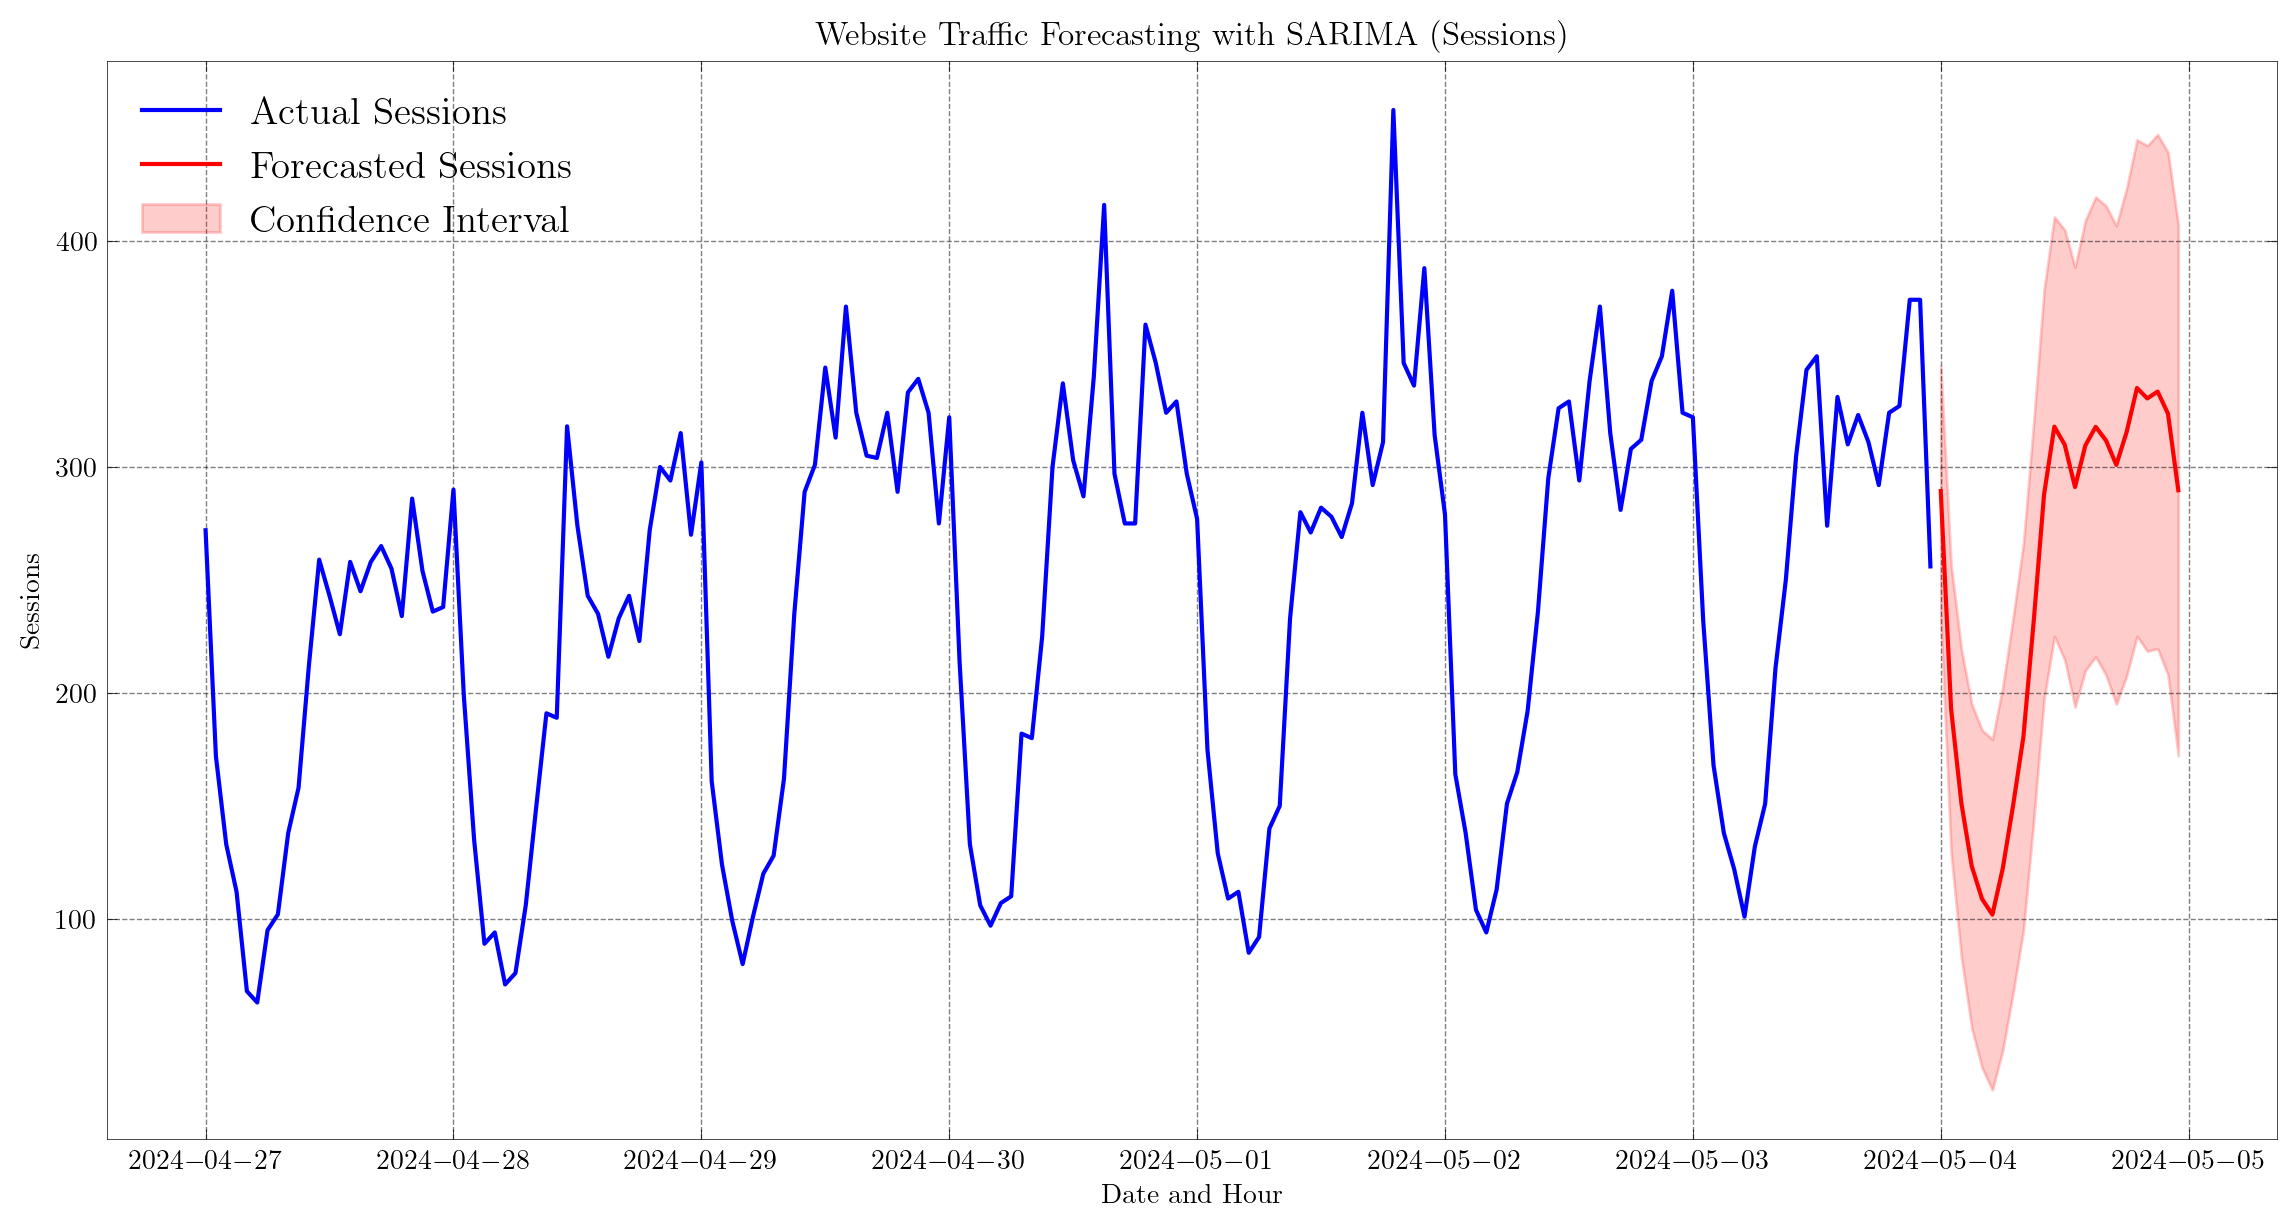

In [16]:
time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24


sarima_model = SARIMAX(time_series_data,
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, seasonal_period))
sarima_model_fit = sarima_model.fit()

# forecast the next 24 hours using the Seasonal AutoRegressive Integrated Moving Average (SARIMA) model
sarima_forecast = sarima_model_fit.forecast(steps=24)
confidence_intervals = sarima_model_fit.get_forecast(steps=24).conf_int()

# plotting the actual data and the SARIMA forecast
plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index[-168:], time_series_data[-168:], label='Actual Sessions', color='blue')  # last week data
plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:], sarima_forecast, label='Forecasted Sessions', color='red')

# Confidence Interval
plt.fill_between(pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:], 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], 
                 color='red', alpha=0.2, label="Confidence Interval")

plt.title('Website Traffic Forecasting with SARIMA (Sessions)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

In [17]:
df['Traffic source'].value_counts()

Traffic source
Direct            672
Organic Social    672
Organic Search    672
Referral          672
Unassigned        366
Organic Video     125
Email               3
Name: count, dtype: int64

In [18]:
time_series_data

Date + hour (YYYYMMDDHH)
2024-04-06 00:00:00    270.0
2024-04-06 01:00:00    142.0
2024-04-06 02:00:00    142.0
2024-04-06 03:00:00    122.0
2024-04-06 04:00:00    102.0
                       ...  
2024-05-03 19:00:00    324.0
2024-05-03 20:00:00    327.0
2024-05-03 21:00:00    374.0
2024-05-03 22:00:00    374.0
2024-05-03 23:00:00    256.0
Freq: h, Name: Sessions, Length: 672, dtype: float64

## User Input for Custom Forecast

Using this, you can forecast the website traffic coming from a particular traffic source (eg. Organic Social, Direct, Referral, etc.).

Forecasting website traffic for Referral traffic source...



/opt/anaconda3/envs/ML-Projects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency h will be used.

/opt/anaconda3/envs/ML-Projects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency h will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72548D+00    |proj g|=  3.33095D-02

At iterate    5    f=  3.50497D+00    |proj g|=  1.52757D-01

At iterate   10    f=  3.45179D+00    |proj g|=  1.35908D-02

At iterate   15    f=  3.44473D+00    |proj g|=  1.97674D-04

At iterate   20    f=  3.44464D+00    |proj g|=  3.88540D-03

At iterate   25    f=  3.44446D+00    |proj g|=  1.67893D-03

At iterate   30    f=  3.44444D+00    |proj g|=  2.13968D-04

At iterate   35    f=  3.44444D+00    |proj g|=  8.07559D-05

At iterate   40    f=  3.44444D+00    |proj g|=  2.97329D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/var/folders/xy/2yvnpx8d56vfjg1nvw677xx80000gn/T/ipykernel_9941/2534096044.py:22: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



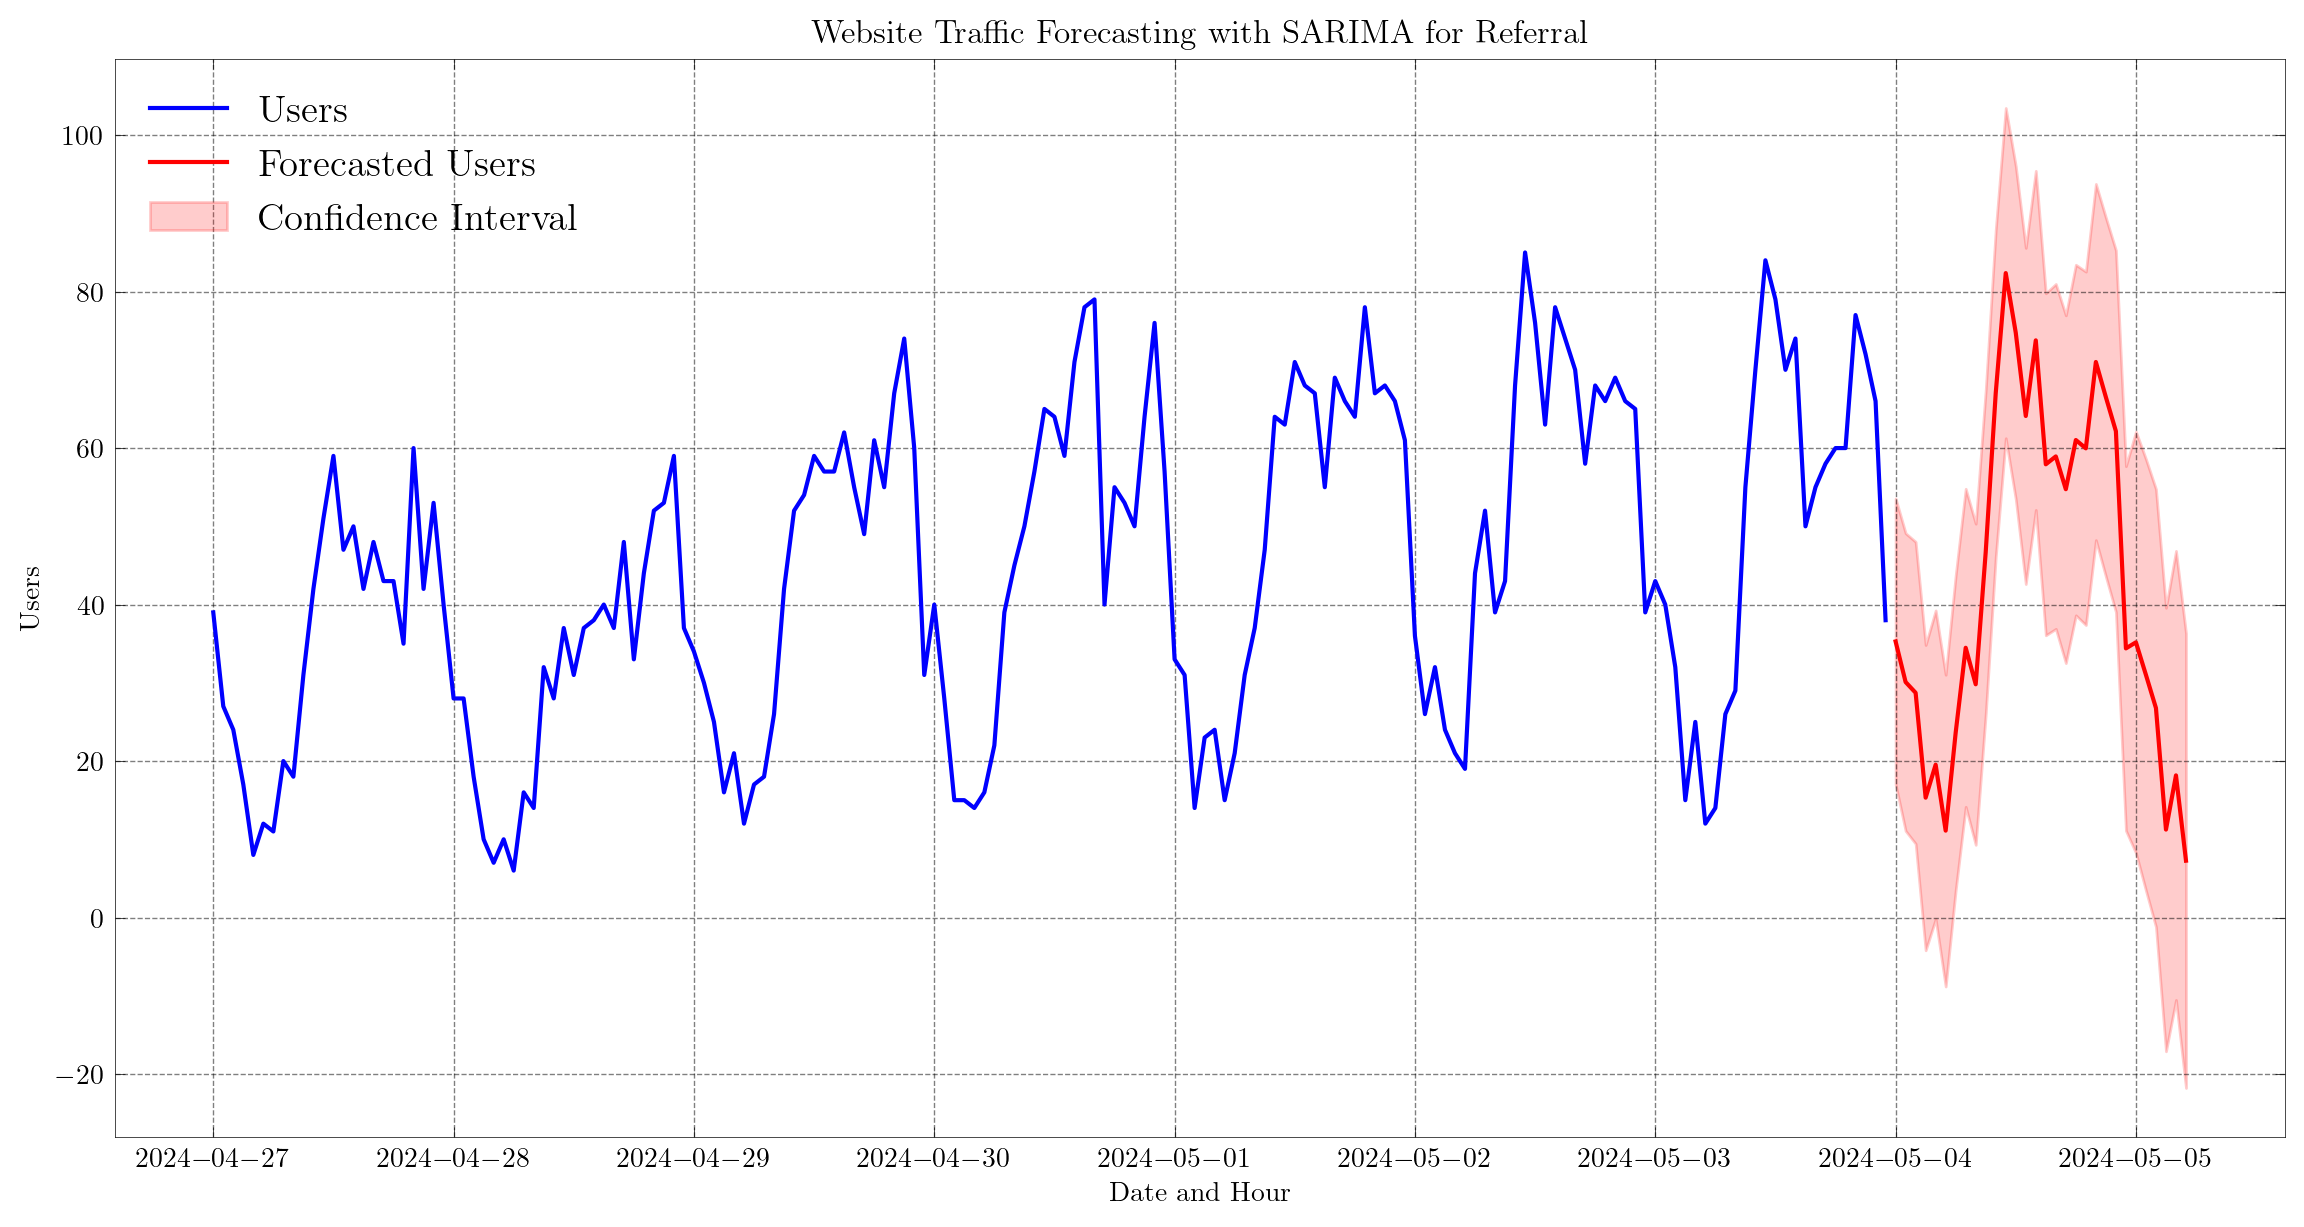

In [19]:
user_traffic_source = input("Enter traffic source (e.g., Organic Social, Direct, Referral, etc.): ")

print(f"Forecasting website traffic for {user_traffic_source} traffic source...\n")

# Filter dataset by user-selected traffic source
filtered_data = grouped_data_2[grouped_data_2['Traffic source'] == user_traffic_source].drop('Traffic source', axis=1)

time_period=30 # Hours

# Train SARIMA model and generate forecast
model = SARIMAX(filtered_data, order=(1,1,1), seasonal_order=(1,2,1,24))
sarima_fit = model.fit()
forecast = sarima_fit.forecast(steps=time_period)
confidence_intervals = sarima_fit.get_forecast(steps=time_period).conf_int()

# Plot the actual data and the SARIMA forecast
plt.figure(figsize=(14, 7))
plt.plot(filtered_data.index[-168:], filtered_data[-168:], label='Users', color='blue')  # last week data
plt.plot(pd.date_range(filtered_data.index[-1], periods=time_period+1, freq='h')[1:], forecast, label='Forecasted Users', color='red')

# Confidence Interval
plt.fill_between(pd.date_range(time_series_data.index[-1], periods=time_period+1, freq='H')[1:], 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], 
                 color='red', alpha=0.2, label="Confidence Interval")

plt.title('Website Traffic Forecasting with SARIMA for ' + user_traffic_source)
plt.xlabel('Date and Hour')
plt.ylabel('Users')
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

## Conclusion

1. Traffic shows periodic variations, likely linked to content updates or campaigns.
2. Engagement metrics highlight strong user interactions.
3. SARIMA forecasting provides insights into expected future traffic.